In [1]:
#using Pkg
#Pkg.add(PackageSpec(name="ReinforcementLearning", version="0.10.2"))
#Pkg.add(PackageSpec(name="Flux", version="0.12.7"))
#Pkg.instantiate()
using Revise
#using Plots
using GLMakie
using JLD2

pathBase = joinpath(@__DIR__, "../src/")

includet(pathBase * "RLEnvironmentToyModel.jl")
includet(pathBase * "MADDPGManagerAlt.jl")
#includet(pathBase * "PendulumCopy.jl")
#includet(pathBase * "SpeakerListenerEnvCopy.jl")
includet(pathBase * "RLExperiment.jl")
includet(pathBase * "Training.jl")
includet(pathBase * "Misc.jl")
includet(pathBase * "SharedStructs.jl")
using .SharedStructs

In [10]:
# set default parameters
parameters = Dict(

## physics
"kEl" => 5e-3,
"pThresh" => 2,
"randBool" => true, 
"pInitArg" => (10, 25), 
"ndt" => 1, 

## parameters of the imposed force law 
"kst" => 1e-1, # stiffness times the drag
"pst" => 25, # equilibrium separation

## parameters of the Environment object
"nSteps" => 100, # number of steps in one episode
"bounds" => 5e0 .* [1e0, 1e-2, 1e0, 1e-2], # range of allowed increments of the activityCoefficients
"rewP" => 1, # strength of the penalty used to compute the reward
"extraActionsBool" => false, # whether the include y / theta coefficients in action space
    
## parameters of the Experiment object
"seed" => 10, # random seed for network initialization
"eps_or_hrs" => "eps", # terminate after nEpisodes epsiodes ("eps") or nEpisodes hours ("hrs")
"envMarker" => "toy",
"nEpisodes" => 2000, # number of episodes / hours
"stepStride" => 1,
"episodeStride" => 1,
"batchSize" => 128, # how many samples to include in replay buffer used to train the networks
"updateFreq" => 10, # how many steps to do before updating the network parameters 
"netLayers" => 1,
"netWidth" => 32,
"gamma" => 0.99f0, 
"rho" => 0.995f0,
    
"act_limit" => 1.0,
"act_noise" => 0e-1,
"annealBool" => false,
"annealTime" => 250
    
);


In [6]:
zeros(1)

1-element Vector{Float64}:
 0.0

In [ ]:
GC.gc()

In [11]:
ex = InitializeAndRunToyExperiment(parameters)
#ex = CreateDDPGExperiment(parameters)
hookResults = ex.hook.episodeList;

# Toy spring model RL with DDPG


Progress: 100%|█████████████████████████████████████████| Time: 0:00:20


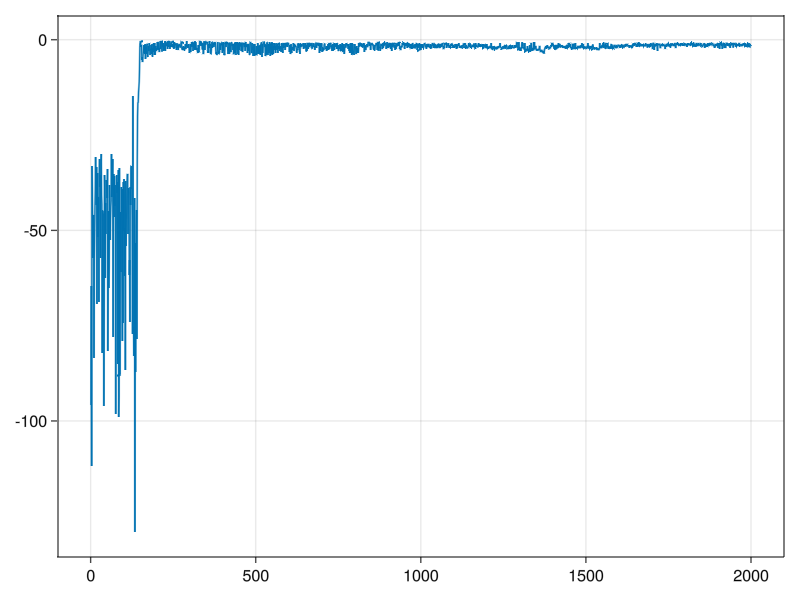

In [12]:
Makie.lines([sum(hookResults[ep].rewards[1:end])  for ep in 1:length(hookResults)])
#ylims!(-10000,100.0)

current_figure()

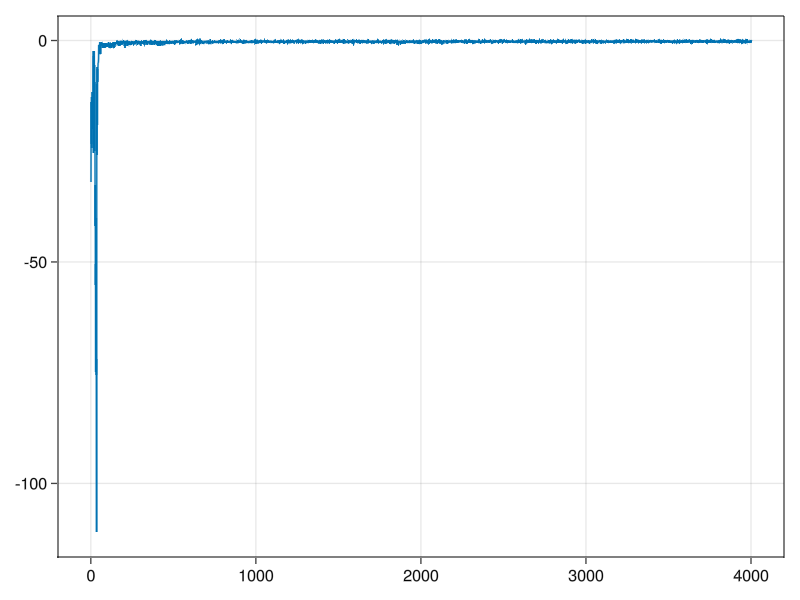

In [111]:
Makie.lines([sum(hookResults[ep].rewards[1:end])  for ep in 1:length(hookResults)])
#ylims!(-10000,0.0)

current_figure()


###### ep = 20
Makie.lines([hookResults[ep].rewards[t] for t in 1:100])

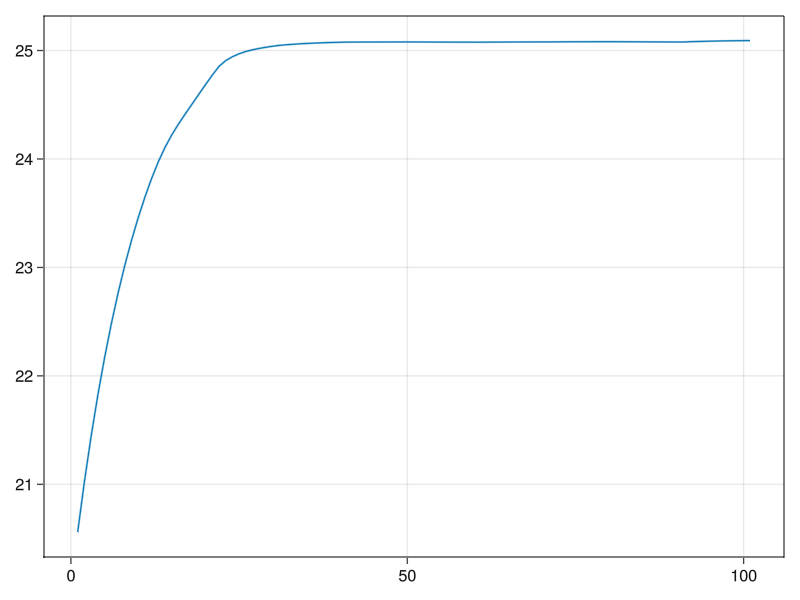

In [37]:
ep = 3900
#Makie.lines([hookResults[ep].sSList[t].p2 for t in 1:length(hookResults[ep].sSList)])
Makie.lines([hookResults[ep].sSList[t].p2 - hookResults[ep].sSList[t].p for t in 1:length(hookResults[ep].sSList)])
#Makie.lines([hookResults[ep].sSList[t].p for t in 1:length(hookResults[ep].sSList)])
#Makie.ylims!(0,10)
#Makie.lines(hookResults[ep].rewards)
#Makie.lines!([hookResults[ep].sSList[t].p2 for t in 1:length(hookResults[ep].sSList)])

#Makie.lines!([(hookResults[ep].sSList[t].p - hookResults[ep].sSList[t].p2 - 25) for t in 1:length(hookResults[ep].sSList)])
current_figure()

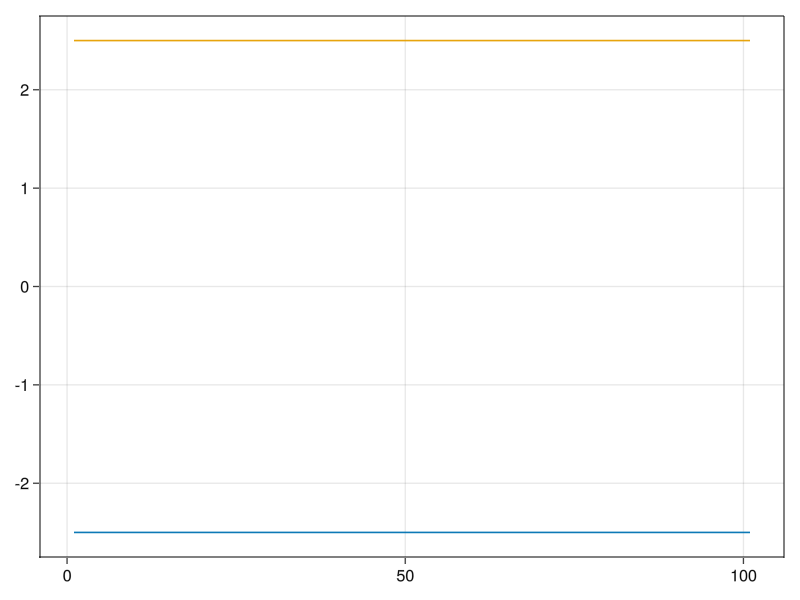

In [175]:
ep = 4000
Makie.lines([hookResults[ep].sSList[t].tweezerParams.rmOff for t in 1:length(hookResults[ep].sSList)])
Makie.lines!([hookResults[ep].sSList[t].tweezerParams.rpOff for t in 1:length(hookResults[ep].sSList)])
#Makie.scatter!([hookResults[ep].sSList[t].p for t in 1:length(hookResults[ep].sSList)])

#Makie.ylims!(0,1)
current_figure()

abs.(ex.hook.minusActorLossList)[end] = 37.684f0
abs.(ex.hook.plusActorLossList)[end] = 37.4905f0


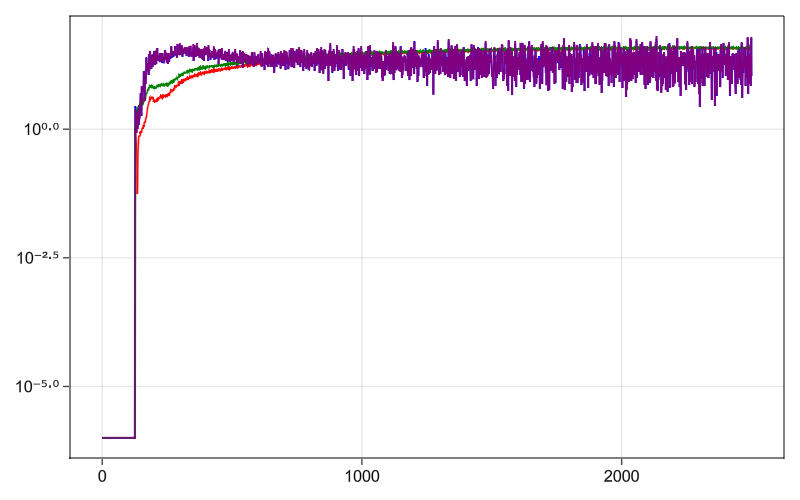

In [98]:
f = Figure(resolution = (800, 500), fontsize = 16, font = "Arial", dpi = 300)
ax = Axis(f[1, 1], yscale = log10)

xs = collect(1:(length(ex.hook.plusActorLossList)))
Makie.lines!(xs, abs.(ex.hook.plusActorLossList) .+ 1e-6, color = :red)
Makie.lines!(xs, abs.(ex.hook.plusCriticLossList).+ 1e-6, color = :blue)

Makie.lines!(xs, abs.(ex.hook.minusActorLossList) .+ 1e-6, color = :green)
Makie.lines!(xs, abs.(ex.hook.minusCriticLossList) .+ 1e-6, color = :purple)

@show abs.(ex.hook.minusActorLossList)[end]
@show abs.(ex.hook.plusActorLossList)[end]
f

In [33]:
f = Figure(resolution = (800, 500), fontsize = 16, font = "Arial", dpi = 300)
ax = Axis(f[1, 1], yscale = log10)

xs = collect(1:(length(ex.hook.plusActorLossList)))
Makie.lines!(xs, abs.(ex.hook.plusActorLossList) .+ 1e-6, color = :red)
Makie.lines!(xs, abs.(ex.hook.plusCriticLossList).+ 1e-6, color = :blue)

Makie.lines!(xs, abs.(ex.hook.minusActorLossList) .+ 1e-6, color = :green)
Makie.lines!(xs, abs.(ex.hook.minusCriticLossList) .+ 1e-6, color = :purple)

@show abs.(ex.hook.minusActorLossList)[end]

f

abs.(ex.hook.minusActorLossList)[end] = 6.014137f15


In [59]:
f = Figure(resolution = (800, 500), fontsize = 16, font = "Arial", dpi = 300)
ax = Axis(f[1, 1], yscale = log10)

xs = collect(1:(length(ex.hook.plusActorLossList)))
Makie.lines!(xs, abs.(ex.hook.plusActorLossList) .+ 1e-6, color = :red)
Makie.lines!(xs, abs.(ex.hook.plusCriticLossList).+ 1e-6, color = :blue)

Makie.lines!(xs, abs.(ex.hook.minusActorLossList) .+ 1e-6, color = :green)
Makie.lines!(xs, abs.(ex.hook.minusCriticLossList) .+ 1e-6, color = :purple)

f

In [346]:
p = ex.policy.agents[:MinusDefect].policy.policy
p.γ
#ρ = p.ρ

10000.0f0

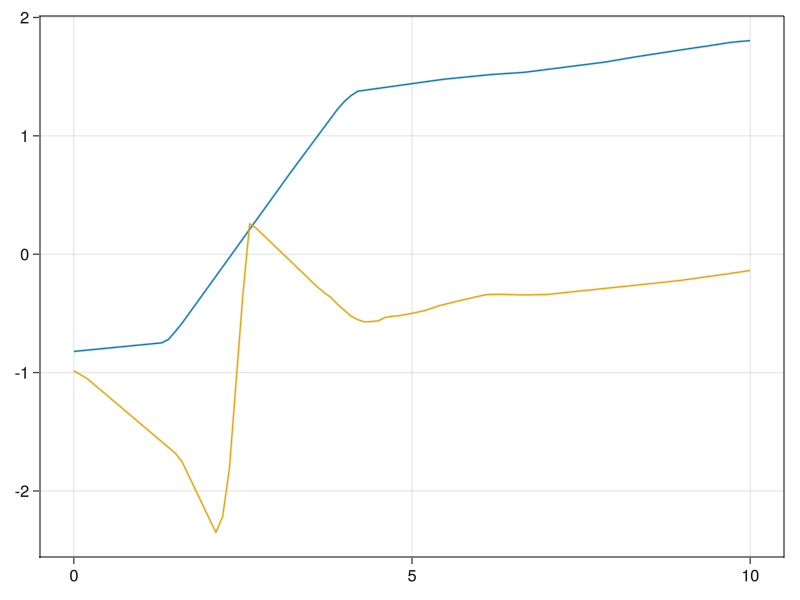

In [174]:
plusOffs = []
minusOffs = []

plusks = []
minusks = []

bounds = 1e0 .* [100, 1e-2, 100, 1e-2]

ps = collect(-40:0.1:40)
ps = collect(0:0.1:10)
#ps = collect(-1:0.1:1)
lastp = 0

for p in ps
#    plusAction = ex.policy.agents[:PlusDefect].policy.policy.target_critic.model([5, 5, p, 0])#, 0, lastp])
#   minusAction = ex.policy.agents[:MinusDefect].policy.policy.target_critic.model([5, 5, 0, p])#, 0, lastp])
     plusAction = ex.policy.agents[:PlusDefect].policy.policy.behavior_actor.model([p])#, 0, lastp])
     minusAction = ex.policy.agents[:MinusDefect].policy.policy.behavior_actor.model([p])#, 0, lastp])
    
#     plusAction = ex.policy.policy.behavior_critic.model([40, p])
#     minusAction = ex.policy.policy.behavior_critic.model([40, p])
#     plusAction = ex.policy.policy.target_actor.model([p])
#     minusAction = ex.policy.policy.target_actor.model([p])
    push!(plusOffs, plusAction[1])
    push!(minusOffs, minusAction[1])
    
#     push!(plusks, bounds[2] * (tanh(plusAction[2]) + 1))
#     push!(minusks, bounds[4] * (tanh(minusAction[2]) + 1))
end

Makie.lines(ps, Vector{Float64}(plusOffs))
Makie.lines!(ps, Vector{Float64}(minusOffs))

# Makie.lines(ps, Vector{Float64}(plusks))
# Makie.lines!(ps, Vector{Float64}(minusks))

current_figure()

In [419]:
plusOffs

401-element Vector{Any}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [179]:
using Flux 
using Statistics 

pip = deepcopy(ex.policy)

# get training data
temp_player = collect(keys(pip.agents))[1]
t = pip.agents[temp_player].trajectory
inds = rand(pip.rng, 1:length(t), pip.batch_size)
batches = Dict((player, RLCore.fetch!(BatchSampler{pip.traces}(pip.batch_size), agent.trajectory, inds))
               for (player, agent) in pip.agents)

# # get s, a, s′ for critic
s = vcat((batches[player][:state] for (player, _) in pip.agents)...)
a = vcat((batches[player][:action] for (player, _) in pip.agents)...)
r = vcat((batches[player][:reward] for (player, _) in pip.agents)...)
t = vcat((batches[player][:terminal] for (player, _) in pip.agents)...)
s′ = vcat((batches[player][:next_state] for (player, _) in pip.agents)...)


#player = :Listener
player = :MinusDefect
agent = pip.agents[player]
p = agent.policy.policy # get agent's concrete DDPGPolicy.

A = p.behavior_actor
C = p.behavior_critic
Aₜ = p.target_actor
Cₜ = p.target_critic

γ = p.γ
ρ = p.ρ

# by default A, C, Aₜ, Cₜ on the same device.
batches, s, a, s′ = send_to_device(device(A), (batches, s, a, s′))
r = batches[player][:reward]
t = batches[player][:terminal]
# for training behavior_actor.
mu_actions = vcat(
    ((
        batches[p][:next_state] |>
        a.policy.policy.behavior_actor
    ) for (p, a) in pip.agents)...
)
# for training behavior_critic.
new_actions = vcat(
    ((
        batches[p][:next_state] |>
        a.policy.policy.target_actor
    ) for (p, a) in pip.agents)...
)


qₜ = Cₜ(vcat(s′, new_actions)) |> vec

# y = r .+ γ .* (1 .- t) .* qₜ; # bad part

# gs1 = gradient(Flux.params(C)) do
#     q = C(vcat(s, a)) |> vec
#     loss = mean((y .- q) .^ 2)
#     #ignore_derivatives() do
#         p.critic_loss = loss
#     #end
#     loss
# end

# update!(C, gs1)


gs2 = gradient(Flux.params(A)) do
    v = C(vcat(s, mu_actions)) |> vec
    if pip.traces == SLARTSL
        v .+= ifelse.(mu_l′, 0.0f0, typemin(Float32))
    end
    reg = mean(A(batches[player][:state]) .^ 2)
    loss = - mean(v) + reg * 1e-3
    #Flux.ignore_derivatives() do
        p.actor_loss = loss
    #end
    @show loss
    loss
end


#update!(A, gs2)

loss = NaN


Grads(...)

In [180]:
for p in pip.agents
    println(p)
end

:MinusDefect => typename(Agent)
├─ policy => typename(NamedPolicy)
│  ├─ name => MinusDefect
│  └─ policy => typename(DDPGPolicy)
│     ├─ behavior_actor => typename(NeuralNetworkApproximator)
│     │  ├─ model => typename(Chain)
│     │  │  └─ layers
│     │  │     ├─ 1
│     │  │     │  └─ typename(Dense)
│     │  │     │     ├─ weight => 10×1 Matrix{Float32}
│     │  │     │     ├─ bias => 10-element Vector{Float32}
│     │  │     │     └─ σ => typename(typeof(relu))
│     │  │     ├─ 2
│     │  │     │  └─ typename(Dense)
│     │  │     │     ├─ weight => 10×10 Matrix{Float32}
│     │  │     │     ├─ bias => 10-element Vector{Float32}
│     │  │     │     └─ σ => typename(typeof(relu))
│     │  │     └─ 3
│     │  │        └─ typename(Dense)
│     │  │           ├─ weight => 1×10 Matrix{Float32}
│     │  │           ├─ bias => 1-element Vector{Float32}
│     │  │           └─ σ => typename(typeof(tanh))
│     │  └─ optimizer => typename(Flux.Optimise.Optimiser)
│     │     └─ os =>

In [174]:
 v = C(vcat(s, mu_actions)) |> vec

101000-element Vector{Float64}:
   -7.642975237745554
  -62.59871260789359
 -111.3148178857297
  -24.414878686149205
  -81.30532782491204
  -94.0126020375085
 -111.73247669067116
   -8.252943185178122
 -125.33241324585707
  -88.23163376464808
   -9.2601795725194
  -61.0895886044556
 -140.76891657758762
    ⋮
  -62.38516298220049
 -133.77657011848268
  -99.86298881232756
  -12.815811311411155
  -23.514106691811683
  -74.72662282230861
   -8.501630521980982
 -126.19032082409082
  -26.40835086555548
  -63.37006836554098
   -5.669796547174419
  -13.718022520659826

In [177]:
 v = C(vcat(s, mu_actions)) |> vec
mean(v)

-62.75054095944012

In [180]:
mean(A(batches[player][:state]) .^ 2) * 1e-3

0.5080387766060088

In [93]:
 v = C(vcat(s, mu_actions)) |> vec

129075-element Vector{Float64}:
 -9.234870204500286
 -8.968641387546533
 -9.085675296902986
 -9.039082290086712
 -9.281500304512992
 -8.841705917536936
 -9.395403735102985
 -8.867115422260417
 -8.825671361846496
 -8.701789902667494
 -9.349634057505835
 -9.081478792875878
 -9.663251222669471
  ⋮
 -9.272879970216835
 -9.091986660073996
 -9.545610690887273
 -9.071643755553232
 -9.08979312552403
 -9.307957690966214
 -8.809707522200492
 -9.58267385872411
 -9.044381185733313
 -9.682094695653722
 -9.371835065037736
 -9.474870778284581

In [103]:
C(vcat(s, mu_actions)) 

129075-element Vector{Float64}:
 -9.234870204500286
 -8.968641387546533
 -9.085675296902986
 -9.039082290086712
 -9.281500304512992
 -8.841705917536936
 -9.395403735102985
 -8.867115422260417
 -8.825671361846496
 -8.701789902667494
 -9.349634057505835
 -9.081478792875878
 -9.663251222669471
  ⋮
 -9.272879970216835
 -9.091986660073996
 -9.545610690887273
 -9.071643755553232
 -9.08979312552403
 -9.307957690966214
 -8.809707522200492
 -9.58267385872411
 -9.044381185733313
 -9.682094695653722
 -9.371835065037736
 -9.474870778284581

In [94]:
mu_actions

7×129075 Matrix{Float64}:
 -2.10891e-12  -8.04656e-11  -8.04656e-11  …  -2.10891e-12  -2.10891e-12
 -2.46336e-11   7.60117e-11   7.60117e-11     -2.46336e-11  -2.46336e-11
  9.29058e-12   1.77142e-11   1.77142e-11      9.29058e-12   9.29058e-12
 -7.75904e-5   -0.00156373   -0.00067672      -7.75904e-5   -7.75904e-5
 -0.000176544  -0.00273717    0.000328715     -0.000176544  -0.000176544
  0.000119085   0.00339548    0.000650342  …   0.000119085   0.000119085
 -7.75942e-5   -0.000189886  -0.00037087      -7.75942e-5   -7.75942e-5

In [198]:
A(batches[player][:state]) .^ 2

1×128 Matrix{Float64}:
 10.231  320.216  1014.9  48.3079  …  1157.94  22.0713  1741.44  3.09218

In [202]:
A(batches[player][:state]) .^ 2

1×128 Matrix{Float64}:
 10.231  320.216  1014.9  48.3079  …  1157.94  22.0713  1741.44  3.09218

In [654]:
mu_actions = vcat(
            ((
                batches[p][:next_state] |>
                a.policy.policy.behavior_actor
            ) for (p, a) in pip.agents)...
        )
        # for training behavior_critic.
        new_actions = vcat(
            ((
                batches[p][:next_state] |>
                a.policy.policy.target_actor
            ) for (p, a) in pip.agents)...
        )

v = C(vcat(s, mu_actions)) |> vec

mean(A(batches[player][:state]) .^ 2)

0.10011971054506957

In [655]:
-mean(v)

-38.04960828750615

In [22]:
γ = pip.agents[:PlusDefect].policy.policy.γ
ρ = pip.agents[:PlusDefect].policy.policy.ρ

0.995f0

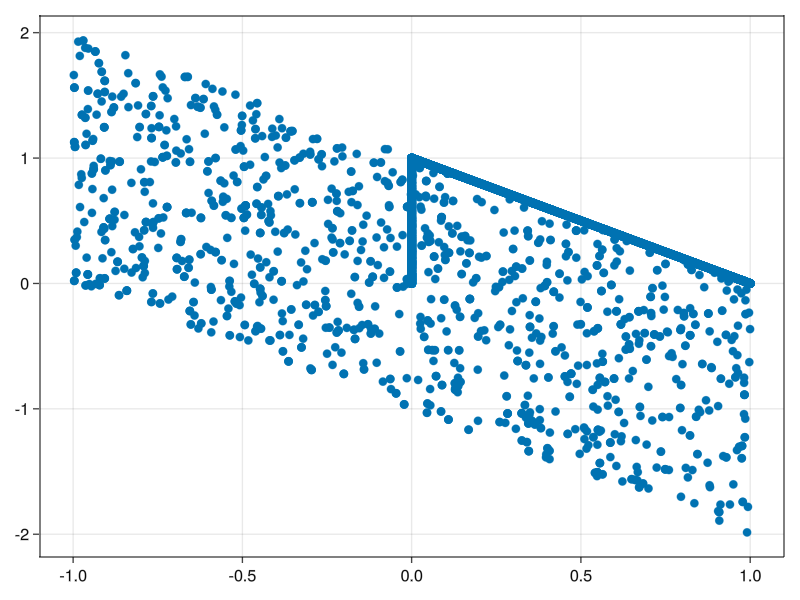

In [87]:
Makie.scatter(a[2,1:end], r[2,1:end])

In [136]:
pip = ex.policy

inds = rand(pip.rng, 1:length(t), pip.batch_size)

batches = Dict((player, RLCore.fetch!(BatchSampler{pip.traces}(pip.batch_size), agent.trajectory, inds))
for (player, agent) in pip.agents)

 # get s, a, s′ for critic
    s = vcat((batches[player][:state] for (player, _) in pip.agents)...)
    a = vcat((batches[player][:action] for (player, _) in pip.agents)...)
    s′ = vcat((batches[player][:next_state] for (player, _) in pip.agents)...)

batches, s, a, s′ = send_to_device(device(A), (batches, s, a, s′))

vcat(s′, new_actions)


Cₜ = ex.policy.agents[:PlusDefect].policy.policy.behavior_critic

qₜ = Cₜ(vcat(s′, new_actions)) |> vec
#Makie.scatter(batches[:PlusDefect][:action][1:end], batches[:PlusDefect][:reward][1:end])

LoadError: UndefVarError: `A` not defined

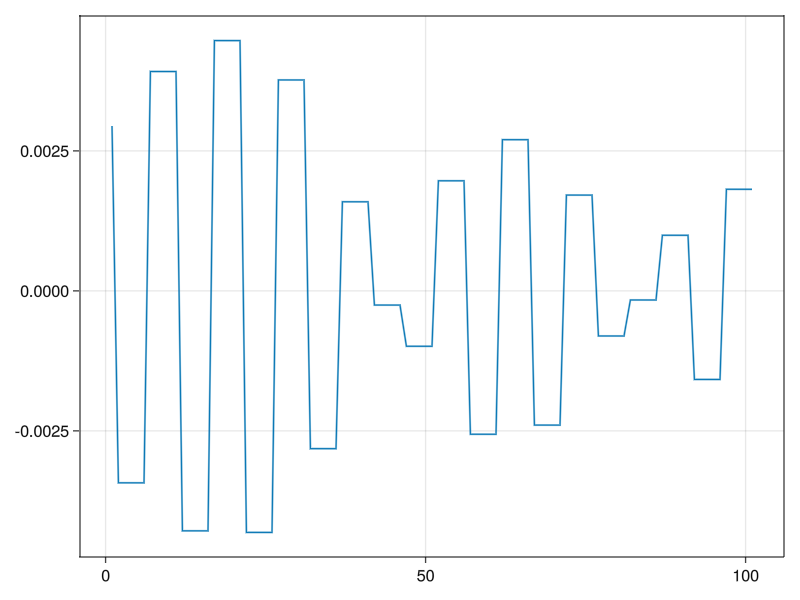

In [144]:
ep = 12000
Makie.lines([hookResults[ep].sSList[t].tweezerParams.rmOff for t in 1:length(hookResults[ep].sSList)])
Makie.lines!([hookResults[ep].sSList[t].tweezerParams.rpOff for t in 1:length(hookResults[ep].sSList)])

Makie.lines(hookResults[ep].rewards)

Makie.lines([hookResults[ep].sSList[t].tweezerParams.rmOff - hookResults[ep].sSList[t].tweezerParams.rpOff for t in 1:length(hookResults[ep].sSList)])

current_figure()

In [196]:
ep = 100
ind = 25
s = deepcopy(hookResults[ep].sSList[ind].lastp)
rmOff = deepcopy(hookResults[ep].sSList[ind].tweezerParams.rmOff) 
rpOff = deepcopy(hookResults[ep].sSList[ind].tweezerParams.rpOff) 

for _ in 1:1
    s += -2 * 1e-2 * s + 1e-2 * (rmOff) - 1e-2 * (rpOff)
end

@show hookResults[ep].sSList[ind].lastp
@show rmOff
@show rpOff
@show s
@show hookResults[ep].sSList[ind].p

((hookResults[ep]).sSList[ind]).lastp = 15.3945097131619
rmOff = 2.1722221067352852e-6
rpOff = -1.0509575678706166e-6
s = 15.08661955113046
((hookResults[ep]).sSList[ind]).p = 15.08661955113046


15.08661955113046

In [140]:
p = ex.policy

inds, batch = sample(p.rng, traj, BatchSampler{SARTS}(p.batch_size))

LoadError: UndefVarError: `traj` not defined

In [141]:
i = length(ex.policy.agents[:MinusDefect].trajectory.traces[1])-1
i = 100 * 2 + 8
sm = ex.policy.agents[:MinusDefect].trajectory.traces[1][i]
am = ex.policy.agents[:MinusDefect].trajectory.traces[2][i]
rm = ex.policy.agents[:MinusDefect].trajectory.traces[3][i]
tm = ex.policy.agents[:MinusDefect].trajectory.traces[4][i]

sp = ex.policy.agents[:PlusDefect].trajectory.traces[1][i]
ap = ex.policy.agents[:PlusDefect].trajectory.traces[2][i]
rp = ex.policy.agents[:PlusDefect].trajectory.traces[3][i]
tp = ex.policy.agents[:PlusDefect].trajectory.traces[4][i]


@show sm 
@show ap 
@show am 
@show rp 

sm = 21.712631145354045
ap = 0.6200322383278984
am = -0.9731870384791719
rp = 20.119411f0


20.119411f0

In [102]:
ex.policy.agents[:PlusDefect].trajectory.traces[2][1:end]

50501-element Vector{Float64}:
   0.41197174389820423
  -0.24726617428897235
   0.08800621989106361
  -0.06509000165025602
   0.10859004694849439
   0.5013477428401187
  -0.8951758623635939
  -0.19969875293139738
   0.9820770750941059
  -0.7769931050754235
   0.5004936267342739
  -0.42608071507352685
   0.9786943949893323
   ⋮
  -0.03822138994585051
  -0.006649777088978088
   0.026598125781233523
   0.03369004603284829
   0.010734628007408507
  -0.020176283337598383
  -0.02702761901904395
   0.005252765412546183
   0.025585002489165908
   0.021302353909806015
  -0.001266933079392332
 -52.90977383638964

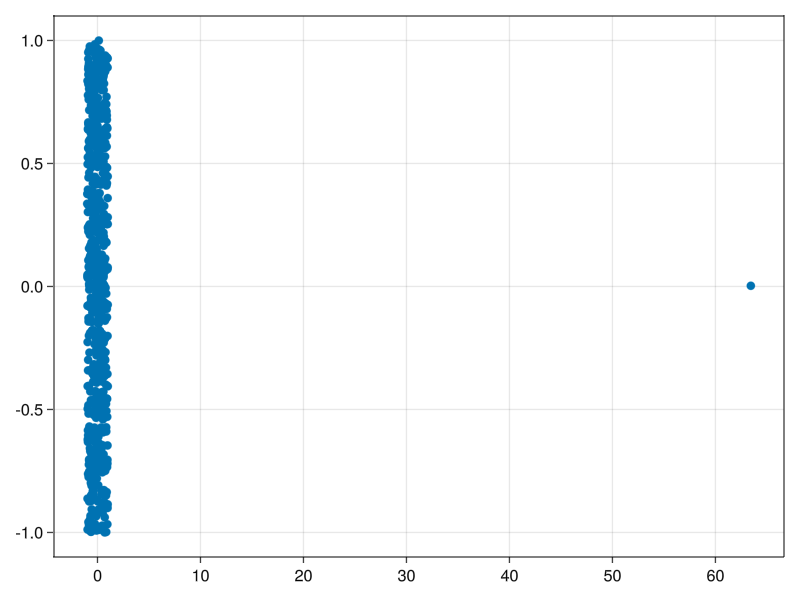

In [96]:
Makie.scatter(ex.policy.agents[:PlusDefect].trajectory.traces[2][2:end],
    ex.policy.agents[:PlusDefect].trajectory.traces[3][1:end])

In [302]:
maximum(ex.policy.agents[:MinusDefect].trajectory.traces[2][1:end-1])

1.0

In [226]:
s = deepcopy(sm)
r1Off = bounds[1] * ap
r2Off = bounds[3] * am

for _ in 1:1
    s += -2 * 1e-2 * s + 1e-2 * (r2Off) - 1e-2 * (r1Off)
end

-(s-25)^2

-236.2133987040847

In [129]:
using ReinforcementLearning
using StableRNGs
using Flux
using Flux.Losses
using IntervalSets


Base.@kwdef mutable struct PendulumHook <: AbstractHook
    actorLossList::Vector{Real} = []
    criticLossList::Vector{Real} = []


end

function (hook::PendulumHook)(::PostEpisodeStage, agent, env)

    push!(hook.actorLossList, agent.policy.actor_loss)
    push!(hook.criticLossList, agent.policy.critic_loss)

end



function RL.Experiment(
    ::Val{:JuliaRL},
    ::Val{:DDPG},
    ::Val{:Pendulum},
    ::Nothing;
    seed = 123,
)
    rng = StableRNG(seed)
    inner_env = PendulumEnv(T = Float32, rng = rng)
    A = action_space(inner_env)
    low = A.left
    high = A.right
    ns = length(state(inner_env))
    na = 1

    env = ActionTransformedEnv(
        inner_env;
        action_mapping = x -> low + (x + 1) * 0.5 * (high - low),
        #action_mapping = x -> x,
    )
    init = glorot_uniform(rng)

    create_actor() = Chain(
        Dense(ns, 30, relu; init = init),
        Dense(30, 30, relu; init = init),
        Dense(30, 1, tanh; init = init),
    ) |> gpu

    create_critic() = Chain(
        Dense(ns + na, 30, relu; init = init),
        Dense(30, 30, relu; init = init),
        Dense(30, 1; init = init),
    ) |> gpu

    agent = Agent(
        policy = DDPGPolicy(
            behavior_actor = NeuralNetworkApproximator(
                model = create_actor(),
                optimizer = ADAM(),
            ),
            behavior_critic = NeuralNetworkApproximator(
                model = create_critic(),
                optimizer = ADAM(),
            ),
            target_actor = NeuralNetworkApproximator(
                model = create_actor(),
                optimizer = ADAM(),
            ),
            target_critic = NeuralNetworkApproximator(
                model = create_critic(),
                optimizer = ADAM(),
            ),
            γ = 0.99f0,
            ρ = 0.995f0,
            na = 1,
            batch_size = 64,
            start_steps = 1000,
            start_policy = RandomPolicy(-1.0..1.0; rng = rng),
            update_after = 1000,
            update_freq = 1,
            act_limit = 1.0,
            act_noise = 0.0,
            rng = rng,
        ),
        trajectory = CircularArraySARTTrajectory(
            capacity = 10000,
            state = Vector{Float32} => (ns,),
            action = Float32 => (na, ),
        ),
    )

    #stop_condition = StopAfterStep(50_000, is_show_progress=!haskey(ENV, "CI"))
    stop_condition = StopAfterEpisode(500, is_show_progress=!haskey(ENV, "CI"))
    #hook = PendulumHook()
    hook = TotalRewardPerEpisode()
    Experiment(agent, env, stop_condition, hook, "# Play Pendulum with DDPG")
end

In [130]:
exP = E`JuliaRL_DDPG_Pendulum`
run(exP)

# Play Pendulum with DDPG


Progress: 100%|█████████████████████████████████████████| Time: 0:00:52


               ⠀⠀⠀⠀⠀⠀⠀⠀⠀Total reward per episode⠀⠀⠀⠀⠀⠀⠀⠀⠀ 
               ┌────────────────────────────────────────┐ 
             0 │⠀⠀⣇⣇⣸⣸⣿⣇⣿⣿⣀⣿⣀⣿⣇⣸⣀⣀⣿⣿⣸⣸⣸⣸⣀⣇⣇⣿⣸⣇⣸⣿⣸⣼⣸⣸⣸⣼⣷⣇│ 
               │⠀⠀⣿⣿⡟⣿⢿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢿⢹⣿⡿⣿⣿⢿⣿⢿⢸│ 
               │⠀⢸⣿⠈⠁⠀⠸⠘⡇⢸⣿⠈⢸⡇⣿⡇⢸⡇⠇⢻⠀⠙⡇⠘⠈⡇⠸⠸⢹⡇⠘⠈⠁⠁⠉⡇⠈⠀⠘⠀│ 
               │⠀⣼⣿⠀⠀⠀⠀⠀⠀⢸⣿⠀⢸⡇⣿⡇⢸⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡇⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀│ 
               │⠀⣿⣿⠀⠀⠀⠀⠀⠀⢸⣿⠀⢸⡇⣿⡇⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡇⠀⠀⠀⠀⠀⠇⠀⠀⠀⠀│ 
               │⠀⣿⣿⠀⠀⠀⠀⠀⠀⢸⣿⠀⢸⡇⣿⡇⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
               │⠀⣿⣿⠀⠀⠀⠀⠀⠀⢸⣿⠀⢸⡇⣿⡇⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
   Score       │⡆⣿⣿⠀⠀⠀⠀⠀⠀⠸⡇⠀⢸⡇⣿⡇⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
               │⣧⢿⣿⠀⠀⠀⠀⠀⠀⠀⡇⠀⢸⡇⠻⡇⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
               │⣿⢸⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡇⠀⡇⠘⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
               │⣿⢸⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡇⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
               │⣿⠈⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠁⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
               │⣿⠀⠘⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
               │⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
         -2000 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

# Play Pendulum with DDPG


typename(Experiment)
├─ policy => typename(Agent)
│  ├─ policy => typename(DDPGPolicy)
│  │  ├─ behavior_actor => typename(NeuralNetworkApproximator)
│  │  │  ├─ model => typename(Chain)
│  │  │  │  └─ layers
│  │  │  │     ├─ 1
│  │  │  │     │  └─ typename(Dense)
│  │  │  │     │     ├─ weight => 30×3 Matrix{Float32}
│  │  │  │     │     ├─ bias => 30-element Vector{Float32}
│  │  │  │     │     └─ σ => typename(typeof(relu))
│  │  │  │     ├─ 2
│  │  │  │     │  └─ typename(Dense)
│  │  │  │     │     ├─ weight => 30×30 Matrix{Float32}
│  │  │  │     │     ├─ bias => 30-element Vector{Float32}
│  │  │  │     │     └─ σ => typename(typeof(relu))
│  │  │  │     └─ 3
│  │  │  │        └─ typename(Dense)
│  │  │  │           ├─ weight => 1×30 Matrix{Float32}
│  │  │  │           ├─ bias => 1-element Vector{Float32}
│  │  │  │           └─ σ => typename(typeof(tanh))
│  │  │  └─ optimizer => typename(ADAM)
│  │  │     ├─ eta => 0.001
│  │  │     ├─ beta
│  │  │     │  ├─ 1
│  │  │     │ 

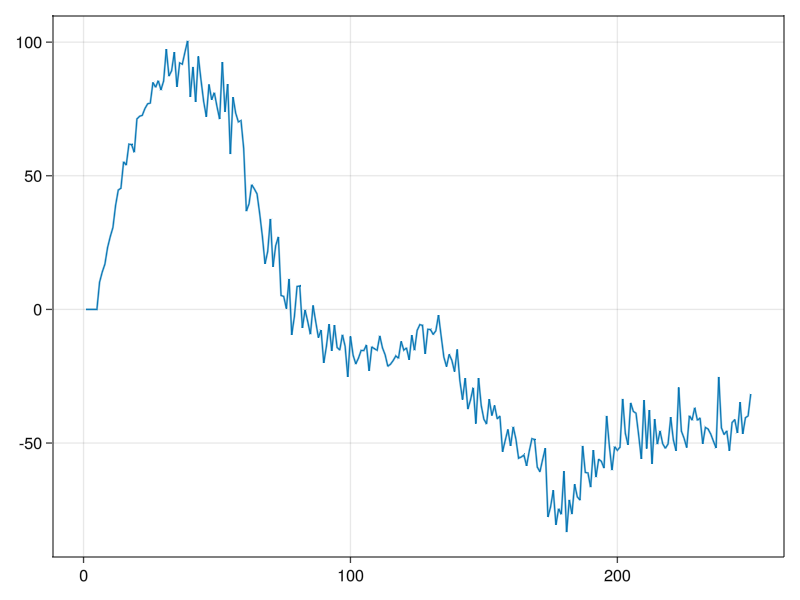

In [302]:
f = Figure(resolution = (800, 500), fontsize = 16, font = "Arial", dpi = 300)
ax = Axis(f[1, 1], yscale = log10)

Makie.lines(exP.hook.actorLossList)
#Makie.lines!(ex.hook.criticLossList)

current_figure()

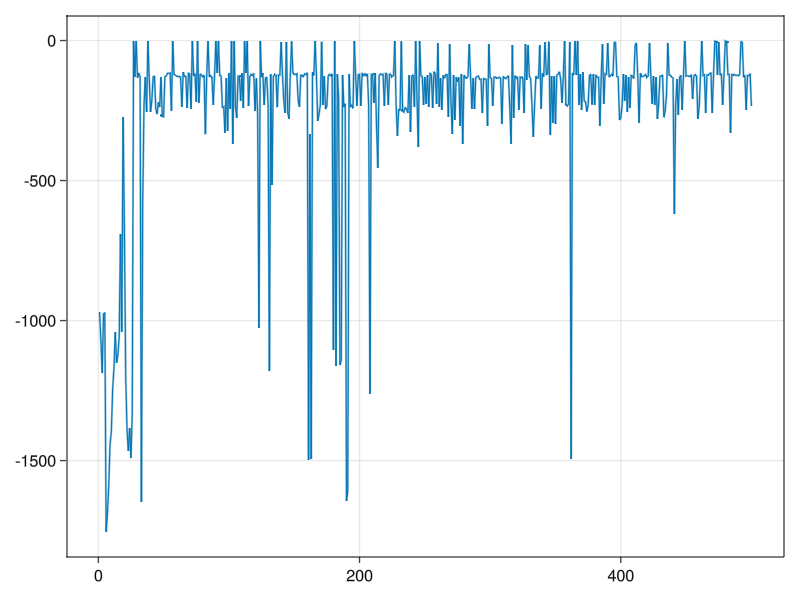

In [131]:
Makie.lines(exP.hook.rewards)

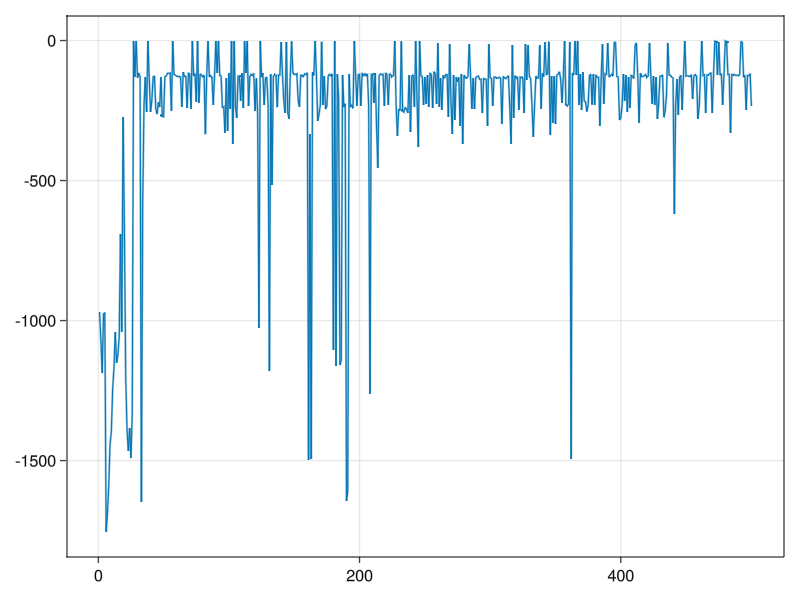

In [128]:
Makie.lines(exP.hook.rewards)

In [24]:
i = length(ex.policy.trajectory.traces[1])-1
i = 100 * 2 + 8
sm = ex.policy.trajectory.traces[1][i]
am = ex.policy.trajectory.traces[2][i]
rm = ex.policy.trajectory.traces[3][i]
tm = ex.policy.trajectory.traces[4][i]

false

In [287]:
exp.policy.trajectory.traces[2]

CircularArrayBuffer(::Matrix{Float32}) with eltype Float32:
 0.9999991f0  1.0f0  1.0f0  1.0f0  1.0f0  1.0f0  …  0.5999978f0  -1.0331846f0

In [4]:
Makie.lines([exP.policy.trajectory.traces[3][i] for i in 1:200])

LoadError: UndefVarError: `Makie` not defined

LoadError: UndefVarError: `Makie` not defined

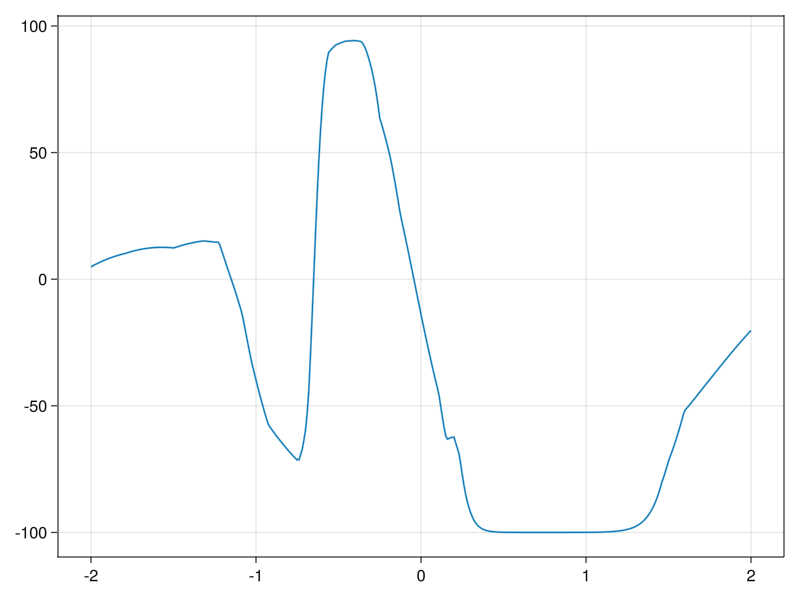

In [233]:
plusOffs = []
minusOffs = []

plusks = []
minusks = []

bounds = 1e0 .* [100, 1e-2, 100, 1e-2]

ps = 0.1 .* collect(-20:0.1:20)

for p in ps
    #plusAction = exP.policy.policy.behavior_actor.model([cos(0.0), sin(0.0), p])
    plusAction = exP.policy.policy.behavior_actor.model([cos(p), sin(p), .0])
    push!(plusOffs, bounds[1] * plusAction[1])

end

Makie.lines(ps, Vector{Float64}(plusOffs))


# Makie.lines(ps, Vector{Float64}(plusks))
# Makie.lines!(ps, Vector{Float64}(minusks))

current_figure()

In [520]:
using ReinforcementLearning
using StableRNGs
using Statistics
using Flux

mutable struct MeanRewardHook <: AbstractHook
    episode::Int
    eval_rate::Int
    eval_episode::Int
    episodes::Vector
    mean_rewards::Vector
end

function (hook::MeanRewardHook)(::PostEpisodeStage, policy, env)
    if hook.episode % hook.eval_rate == 0
        # evaluate policy's performance
        rew = 0
        for _ in 1:hook.eval_episode
            reset!(env)
            while !is_terminated(env)
                env |> policy |> env
                rew += reward(env)
            end
        end

        push!(hook.episodes, hook.episode)
        push!(hook.mean_rewards, rew / hook.eval_episode)
    end
    hook.episode += 1
end

function RL.Experiment(
    ::Val{:JuliaRL},
    ::Val{:MADDPG},
    ::Val{:SpeakerListener},
    ::Nothing;
    seed=123,
)
    rng = StableRNG(seed)
    env = SpeakerListenerEnv(max_steps = 25)

    init = glorot_uniform(rng)
    critic_dim = sum(length(state(env, p)) + length(action_space(env, p)) for p in (:Speaker, :Listener))

    create_actor(player) = Chain(
        Dense(length(state(env, player)), 64, relu; init = init),
        Dense(64, 64, relu; init = init),
        Dense(64, length(action_space(env, player)); init = init)
        )
    create_critic(critic_dim) = Chain(
        Dense(critic_dim, 64, relu; init = init),
        Dense(64, 64, relu; init = init),
        Dense(64, 1; init = init),
        )
    create_policy(player) = DDPGPolicy(
            behavior_actor = NeuralNetworkApproximator(
                model = create_actor(player),
                optimizer = Flux.Optimise.Optimiser(ClipNorm(0.5), ADAM(1e-4)),
            ),
            behavior_critic = NeuralNetworkApproximator(
                model = create_critic(critic_dim),
                optimizer = Flux.Optimise.Optimiser(ClipNorm(0.5), ADAM(1e-4)),
            ),
            target_actor = NeuralNetworkApproximator(
                model = create_actor(player),
            ),
            target_critic = NeuralNetworkApproximator(
                model = create_critic(critic_dim),
            ),
            γ = 0.99f0,
            ρ = 0.995f0,
            na = length(action_space(env, player)),
            start_steps = 0,
            start_policy = nothing,
            update_after = 64 * env.max_steps, # batch_size * env.max_steps
            act_limit = 1.0,
            act_noise = 0.,
            rng = rng,
        )
    create_trajectory(player) = CircularArraySARTTrajectory(
            capacity = 1_000_000, # replay buffer capacity
            state = Vector{Float64} => (length(state(env, player)), ),
            action = Vector{Float64} => (length(action_space(env, player)), ),
         reward = Float64 => (1,)
        )

    agents = MADDPGManagerAlt(
        Dict(
            player => Agent(
                policy = NamedPolicy(player, create_policy(player)),
                trajectory = create_trajectory(player),
            ) for player in (:Speaker, :Listener)
        ),
        SARTS, # trace's type
        64, # batch_size
        100, # update_freq
        0, # initial update_step
        rng
    )

    stop_condition = StopAfterEpisode(2_000, is_show_progress=!haskey(ENV, "CI"))
    hook = MeanRewardHook(0, 8, 100, [], [])
    Experiment(agents, env, stop_condition, hook, "# play SpeakerListener with MADDPG")
end

In [521]:
exS = E`JuliaRL_MADDPG_SpeakerListener`
run(exS)


# play SpeakerListener with MADDPG


Progress: 100%|█████████████████████████████████████████| Time: 0:00:53


# play SpeakerListener with MADDPG


typename(Experiment)
├─ policy => typename(MADDPGManagerAlt)
│  ├─ agents => typename(Dict)
│  ├─ traces
│  │  ├─ 1
│  │  │  └─ state
│  │  ├─ 2
│  │  │  └─ action
│  │  ├─ 3
│  │  │  └─ reward
│  │  ├─ 4
│  │  │  └─ terminal
│  │  └─ 5
│  │     └─ next_state
│  ├─ batch_size => 64
│  ├─ update_freq => 100
│  ├─ update_step => 53190
│  └─ rng => typename(StableRNGs.LehmerRNG)
├─ env => typename(SpeakerListenerEnv)
├─ stop_condition => typename(StopAfterEpisode)
│  ├─ episode => 2000
│  ├─ cur => 2000
│  └─ progress => typename(ProgressMeter.Progress)
├─ hook => typename(MeanRewardHook)
│  ├─ episode => 2000
│  ├─ eval_rate => 8
│  ├─ eval_episode => 100
│  ├─ episodes => 250-element Vector{Any}
│  └─ mean_rewards => 250-element Vector{Any}
└─ description => "# play SpeakerListener with MADDPG"


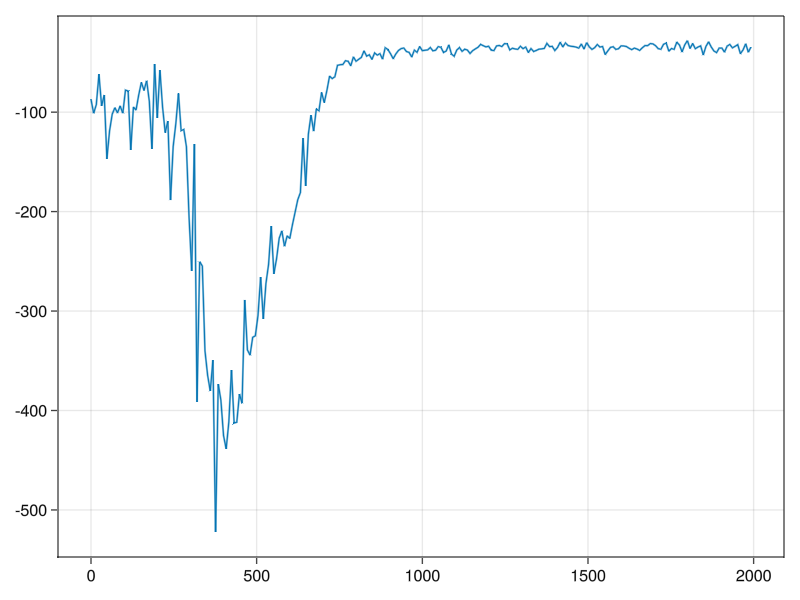

In [522]:
Makie.lines(Vector{Float64}(exS.hook.episodes), Vector{Float64}(exS.hook.mean_rewards[1:end]))

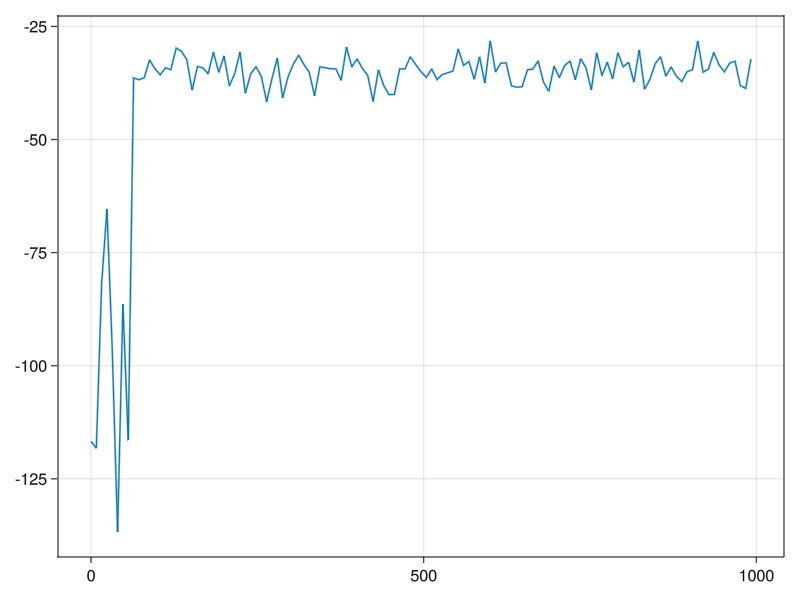

In [120]:
Makie.lines(Vector{Float64}(exS.hook.episodes), Vector{Float64}(exS.hook.mean_rewards[1:end]))